## 3.4 Softmax Regression

pg 114

In [1]:
%matplotlib inline
import sys
from mxnet import gluon
from d2l import mxnet as d2l 

d2l.use_svg_display()

In [2]:
mnist_train=gluon.data.vision.FashionMNIST(train=True)
mnist_test=gluon.data.vision.FashionMNIST(train=False)

[18:35:11] /home/mertins/Desenvolvimento/C/Terceiros/mxnet/src/storage/storage.cc:202: Using Pooled (Naive) StorageManager for CPU


In [3]:
len(mnist_train) ,len(mnist_test)

(60000, 10000)

# Imagem 28x28 com 1 canal apenas

In [4]:
mnist_train[0][0].shape,type(mnist_train[0][0]),type(mnist_train[0]),type(mnist_train)

((28, 28, 1),
 mxnet.numpy.ndarray,
 tuple,
 mxnet.gluon.data.vision.datasets.FashionMNIST)

In [5]:
def get_fashion_mnist_labels(labels):
    text_labels= [
        't-shirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot'
    ]
    return [text_labels[int (i)] for i in labels]

In [6]:
def show_images(imgs,num_rows,num_cols,titles=None,scale=1.5):
    figsize=(num_cols*scale,num_rows*scale)
    _,axes=d2l.plt.subplots(num_rows,num_cols,figsize=figsize)
    axes=axes.flatten()
    for i,(ax,img)in enumerate(zip(axes,imgs)):
        ax.imshow(img.asnumpy())
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

(36, 28, 28, 1)


array([<AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'shirt'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'dress'}>,
       <AxesSubplot:title={'center':'coat'}>,
       <AxesSubplot:title={'center':'coat'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'coat'}>,
       <AxesSubplot:title={'center':'bag'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'bag'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'dress'}>,
       <AxesSubplot:title={'center':'dress'}>,
       <AxesSubplot:title={'center':'dress'}>,
       <AxesSubplot:title={'center':

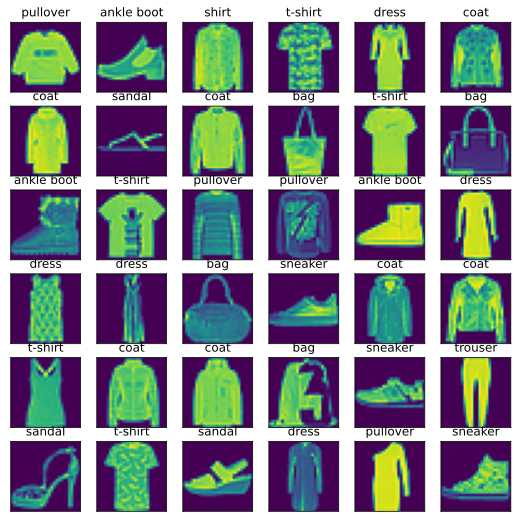

In [7]:
X,y = mnist_train[:36]
print(X.shape)
show_images(X.squeeze(axis=-1),6,6,titles=get_fashion_mnist_labels(y))

In [8]:
batch_size=256

def get_dataloader_workers():
    return 0 if sys.platform.startswith('win') else 4

transformer=gluon.data.vision.transforms.ToTensor()
train_iter=gluon.data.DataLoader(mnist_train.transform_first(transformer),
        batch_size,shuffle=True,
        num_workers=get_dataloader_workers())


In [9]:
timer=d2l.Timer()
for X,y in train_iter:
    continue
f'{timer.stop():.2f} sec'


'2.81 sec'

In [10]:
def load_data_fashion_mnist(batch_size,resize=None):
    dataset=gluon.data.vision
    trans=[dataset.transforms.ToTensor()]
    if resize:
        trans.insert(0,dataset.transforms.Resize(resize))
    trans=dataset.transforms.Compose(trans)
    mnist_train=dataset.FashionMNIST(train=True).transform_first(trans)
    mnist_test=dataset.FashionMNIST(train=False).transform_first(trans)
    return (gluon.data.DataLoader(mnist_train,batch_size,shuffle=True,
                                    num_workers=get_dataloader_workers()),
            gluon.data.DataLoader(mnist_test,batch_size,shuffle=False,
                                    num_workers=get_dataloader_workers()))

In [11]:
train_iter,test_iter=load_data_fashion_mnist(32)
c=1
for X,y in train_iter:
    print(X.shape,X.dtype,y.shape,y.dtype)
    c=c+1
    if c>4:
        break


[ INFO:0] global /builddir/build/BUILD/opencv-4.5.2/modules/core/src/parallel/registry_parallel.impl.hpp (96) ParallelBackendRegistry core(parallel): Enabled backends(2, sorted by priority): TBB(1000); OPENMP(990)
[ INFO:0] global /builddir/build/BUILD/opencv-4.5.2/modules/core/include/opencv2/core/parallel/backend/parallel_for.tbb.hpp (54) ParallelForBackend Initializing TBB parallel backend: TBB_INTERFACE_VERSION=11103
[ INFO:0] global /builddir/build/BUILD/opencv-4.5.2/modules/core/src/parallel/parallel.cpp (77) createParallelForAPI core(parallel): using backend: TBB (priority=1000)
[ INFO:0] global /builddir/build/BUILD/opencv-4.5.2/modules/core/src/parallel/registry_parallel.impl.hpp (96) ParallelBackendRegistry core(parallel): Enabled backends(2, sorted by priority): TBB(1000); OPENMP(990)
[ INFO:0] global /builddir/build/BUILD/opencv-4.5.2/modules/core/include/opencv2/core/parallel/backend/parallel_for.tbb.hpp (54) ParallelForBackend Initializing TBB parallel backend: TBB_INTERF

In [12]:
train_iter,test_iter=load_data_fashion_mnist(32,resize=64)
for X,y in train_iter:
    print(X.shape,X.dtype,y.shape,y.dtype)
    break


[ INFO:0] global /builddir/build/BUILD/opencv-4.5.2/modules/core/src/parallel/registry_parallel.impl.hpp (96) ParallelBackendRegistry core(parallel): Enabled backends(2, sorted by priority): TBB(1000); OPENMP(990)
[ INFO:0] global /builddir/build/BUILD/opencv-4.5.2/modules/core/include/opencv2/core/parallel/backend/parallel_for.tbb.hpp (54) ParallelForBackend Initializing TBB parallel backend: TBB_INTERFACE_VERSION=11103
[ INFO:0] global /builddir/build/BUILD/opencv-4.5.2/modules/core/src/parallel/parallel.cpp (77) createParallelForAPI core(parallel): using backend: TBB (priority=1000)
[ INFO:0] global /builddir/build/BUILD/opencv-4.5.2/modules/core/src/parallel/registry_parallel.impl.hpp (96) ParallelBackendRegistry core(parallel): Enabled backends(2, sorted by priority): TBB(1000); OPENMP(990)
[ INFO:0] global /builddir/build/BUILD/opencv-4.5.2/modules/core/include/opencv2/core/parallel/backend/parallel_for.tbb.hpp (54) ParallelForBackend Initializing TBB parallel backend: TBB_INTERF